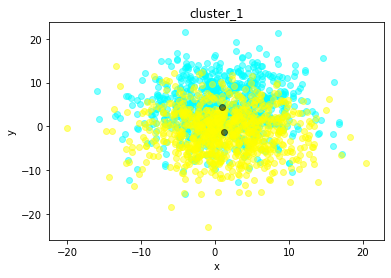

In [4]:
import numpy as np
import matplotlib.pyplot as plt


data = np.load("./datax/train_data1.npy")
label = np.load("./datax/train_label1.npy")

"""
Point class is implemented. Each data point is going to brepresented as an object of this class.
"""

class Point:
    def __init__(self, x, y, cluster):
        self.x = x
        self.y = y
        self.cluster = cluster
    

# Three lists for three clusters.
cluster_0_list = []
cluster_1_list = []
cluster_2_list = []

# This function returns the new cluster
def calculate_cluster(cluster_list):
    xes = []
    ys = []
    for i in cluster_list:
        xes.append(i.x)
        ys.append(i.y)
    xes = np.array(xes)
    ys = np.array(ys)
    x_mean = np.mean(xes)
    y_mean = np.mean(ys)
    
    return [np.array(x_mean), np.array(y_mean)]

# This function returns the xes and ys of a cluster list.
def xes_and_ys(cluster_list):
    xes = []
    ys = []
    for i in cluster_list:
        xes.append(i.x)
        ys.append(i.y)
    xes = np.array(xes)
    ys = np.array(ys)
    
    return xes, ys

# We put each point into it's cluster list.
for i in range(len(data)):
    if label[i] == 0:
        cluster_0_list.append(Point(data[i][0], data[i][1], label[i]))
    elif label[i] == 1:
        cluster_1_list.append(Point(data[i][0], data[i][1], label[i]))
    elif label[i] == 2:
        cluster_2_list.append(Point(data[i][0], data[i][1], label[i]))
        
        
cluster_0 = calculate_cluster(cluster_0_list)
cluster_1 = calculate_cluster(cluster_1_list)
cluster_2 = calculate_cluster(cluster_2_list)

# Here we calculate the initial cluster coordinates.
c_0_x, c_0_y = calculate_cluster(cluster_0_list)
c_1_x, c_1_y = calculate_cluster(cluster_1_list)
c_2_x, c_2_y = calculate_cluster(cluster_2_list)



x_0, y_0 = xes_and_ys(cluster_0_list)
x_1, y_1 = xes_and_ys(cluster_1_list)
x_2, y_2 = xes_and_ys(cluster_2_list)


# Plot
plt.scatter(x_0, y_0, c="cyan", alpha=0.5)
plt.scatter(x_1, y_1, c="yellow", alpha=0.5)
plt.scatter(x_2, y_2, c="#ebc3c0", alpha=0.5)
plt.scatter(cluster_0[0],cluster_0[1], c="black", alpha=0.5)
plt.scatter(cluster_1[0],cluster_1[1], c="black", alpha=0.5)
plt.scatter(cluster_2[0],cluster_2[1], c="black", alpha=0.5)

plt.title('cluster_1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [2]:
def train(data, label, N, cluster_0, cluster_1, cluster_2):
    """
    
    !!!!!!!!! Must select the clusters randomly
    
    """
    # Three lists for three clusters.
    cluster_0_list = []
    cluster_1_list = []
    cluster_2_list = []
    # We put each point into it's cluster list.
    for i in range(len(data)):
        aps_to_0 = cluster_0[0] - data[i][0]
        ordin_to_0 = cluster_0[1] - data[i][1]
        dist_to_cluster_0 = np.linalg.norm(np.array(aps_to_0, ordin_to_0))
            
        aps_to_1 = cluster_1[0] - data[i][0]
        ordin_to_1 = cluster_1[1] - data[i][1]
        dist_to_cluster_1 = np.linalg.norm(np.array(aps_to_1, ordin_to_1))
            
        aps_to_2 = cluster_2[0] - data[i][0]
        ordin_to_2 = cluster_2[1] - data[i][1]
        dist_to_cluster_2 = np.linalg.norm(np.array(aps_to_2, ordin_to_2))
            
        if np.amin(np.array([dist_to_cluster_0, dist_to_cluster_1, dist_to_cluster_2])) == dist_to_cluster_0:
            cluster_1_list.append(Point(data[i][0], data[i][1], -1))
        elif np.amin(np.array([dist_to_cluster_0, dist_to_cluster_1, dist_to_cluster_2])) == dist_to_cluster_1:
            cluster_2_list.append(Point(data[i][0], data[i][1], -1))
        elif np.amin(np.array([dist_to_cluster_0, dist_to_cluster_1, dist_to_cluster_2])) == dist_to_cluster_2:
            cluster_2_list.append(Point(data[i][0], data[i][1], -1))

    
    # We assign new clusters we do this part N times.
    for it in range(0, N):
        # For cluster 0 we assign points the new clusters.
        for i in range(len(cluster_0_list)):
            if i > len(cluster_0_list)-1:
                break
            aps_to_0 = cluster_0[0] - cluster_0_list[i].x
            ordin_to_0 = cluster_0[1] - cluster_0_list[i].y
            dist_to_cluster_0 = np.linalg.norm(np.array(aps_to_0, ordin_to_0))
            
            aps_to_1 = cluster_1[0] - cluster_0_list[i].x
            ordin_to_1 = cluster_1[1] - cluster_0_list[i].y
            dist_to_cluster_1 = np.linalg.norm(np.array(aps_to_1, ordin_to_1))
            
            aps_to_2 = cluster_2[0] - cluster_0_list[i].x
            ordin_to_2 = cluster_2[1] - cluster_0_list[i].y
            dist_to_cluster_2 = np.linalg.norm(np.array(aps_to_2, ordin_to_2))
            
            if np.amin(np.array([dist_to_cluster_0, dist_to_cluster_1, dist_to_cluster_2])) == dist_to_cluster_1:
                cluster_1_list.append(cluster_0_list[i])
                cluster_0_list.remove(cluster_0_list[i])
                i = i-1
            elif np.amin(np.array([dist_to_cluster_0, dist_to_cluster_1, dist_to_cluster_2])) == dist_to_cluster_2:
                cluster_2_list.append(cluster_0_list[i])
                cluster_0_list.remove(cluster_0_list[i])
                i=i-1
            if i == len(cluster_0_list)-1:
                break
            
                
        # For cluster 1 we assign points the new clusters.
        for i in range(len(cluster_1_list)):
            if i > len(cluster_1_list)-1:
                break
            aps_to_0 = cluster_0[0] - cluster_1_list[i].x
            ordin_to_0 = cluster_0[1] - cluster_1_list[i].y
            dist_to_cluster_0 = np.linalg.norm(np.array(aps_to_0, ordin_to_0))
            
            aps_to_1 = cluster_1[0] - cluster_1_list[i].x
            ordin_to_1 = cluster_1[1] - cluster_1_list[i].y
            dist_to_cluster_1 = np.linalg.norm(np.array(aps_to_1, ordin_to_1))
            
            aps_to_2 = cluster_2[0] - cluster_1_list[i].x
            ordin_to_2 = cluster_2[1] - cluster_1_list[i].y
            dist_to_cluster_2 = np.linalg.norm(np.array(aps_to_2, ordin_to_2))
            
            if np.amin(np.array([dist_to_cluster_0, dist_to_cluster_1, dist_to_cluster_2])) == dist_to_cluster_0:
                cluster_0_list.append(cluster_1_list[i])
                cluster_1_list.remove(cluster_1_list[i])
                i = i-1
            elif np.amin(np.array([dist_to_cluster_0, dist_to_cluster_1, dist_to_cluster_2])) == dist_to_cluster_2:
                cluster_2_list.append(cluster_1_list[i])
                cluster_1_list.remove(cluster_1_list[i])
                i = i-1
            if i == len(cluster_1_list)-1:
                break
                
        # For cluster 2 we assign points the new clusters.
        for i in range(len(cluster_2_list)):
            if i > len(cluster_2_list)-1:
                break
            aps_to_0 = cluster_0[0] - cluster_2_list[i].x
            ordin_to_0 = cluster_0[1] - cluster_2_list[i].y
            dist_to_cluster_0 = np.linalg.norm(np.array(aps_to_0, ordin_to_0))
            
            aps_to_1 = cluster_1[0] - cluster_2_list[i].x
            ordin_to_1 = cluster_1[1] - cluster_2_list[i].y
            dist_to_cluster_1 = np.linalg.norm(np.array(aps_to_1, ordin_to_1))
            
            aps_to_2 = cluster_2[0] - cluster_2_list[i].x
            ordin_to_2 = cluster_2[1] - cluster_2_list[i].y
            dist_to_cluster_2 = np.linalg.norm(np.array(aps_to_2, ordin_to_2))
            
            if np.amin(np.array([dist_to_cluster_0, dist_to_cluster_1, dist_to_cluster_2])) == dist_to_cluster_0:
                cluster_0_list.append(cluster_2_list[i])
                cluster_2_list.remove(cluster_2_list[i])
                i = i-1
            elif np.amin(np.array([dist_to_cluster_0, dist_to_cluster_1, dist_to_cluster_2])) == dist_to_cluster_1:
                cluster_1_list.append(cluster_2_list[i])
                cluster_2_list.remove(cluster_2_list[i])
                i = i-1
            if i == len(cluster_2_list)-1:
                break
            
        # Then we calculate the new clusters
        cluster_0 = calculate_cluster(cluster_0_list)
        cluster_1 = calculate_cluster(cluster_1_list)
        cluster_2 = calculate_cluster(cluster_2_list)
        
    
    """
    # Plot
    plt.scatter(x_0, y_0, c="red", alpha=0.5)
    plt.scatter(x_1, y_1, c="blue", alpha=0.5)
    plt.scatter(x_2, y_2, c="green", alpha=0.5)
    plt.scatter(cluster_0[0],cluster_0[1], c="black", alpha=0.5)
    plt.scatter(cluster_1[0],cluster_1[1], c="black", alpha=0.5)
    plt.scatter(cluster_2[0],cluster_2[1], c="black", alpha=0.5)

    plt.title('cluster_1')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    """
        
    print("------" + str(N) + "--------")
    print("Cluster-0: "+ str(cluster_0))
    print("Cluster-1: "+ str(cluster_1))
    print("Cluster-2: "+ str(cluster_2))
    return cluster_0, cluster_1, cluster_2, cluster_0_list, cluster_1_list, cluster_2_list

np.random.seed(1)
cluster_0_list = []
cluster_1_list = []
cluster_2_list = []
cluster_0_init = np.random.uniform(low=-3.0, high=3.0, size=(2,))
cluster_1_init = np.random.uniform(low=-3.0, high=3.0, size=(2,))
cluster_2_init = np.random.uniform(low=-3.0, high=3.0, size=(2,))
train(data, label, 3, cluster_0_init, cluster_1_init, cluster_2_init)

    

------3--------
Cluster-0: [array(6.73071722), array(1.55290888)]
Cluster-1: [array(0.13695516), array(1.39999399)]
Cluster-2: [array(-5.46500705), array(1.82859173)]


([array(6.73071722), array(1.55290888)],
 [array(0.13695516), array(1.39999399)],
 [array(-5.46500705), array(1.82859173)],
  <__main__.Point at 0x111efadd0>])

------1--------
Cluster-0: [array(-5.91323601), array(1.68578)]
Cluster-1: [array(1.48391043), array(1.48138985)]
Cluster-2: [array(2.72509509), array(1.60631671)]
------2--------
Cluster-0: [array(-5.618712), array(1.53039686)]
Cluster-1: [array(0.45365742), array(1.4263388)]
Cluster-2: [array(5.03152109), array(1.69806081)]
------3--------
Cluster-0: [array(-5.81553129), array(1.68911839)]
Cluster-1: [array(-0.09541592), array(1.32271876)]
Cluster-2: [array(6.27248063), array(1.71693515)]
------4--------
Cluster-0: [array(-6.06353223), array(1.75791218)]
Cluster-1: [array(-0.08263869), array(1.54384515)]
Cluster-2: [array(6.80328307), array(1.44773668)]
------5--------
Cluster-0: [array(-6.15155186), array(1.84022116)]
Cluster-1: [array(0.07214542), array(1.41795987)]
Cluster-2: [array(7.09494838), array(1.5509482)]
------6--------
Cluster-0: [array(-6.16681891), array(1.84608541)]
Cluster-1: [array(0.21725388), array(1.39005745)]
Cluster-2: [array(7.2205452), array(1.58470313)]
----

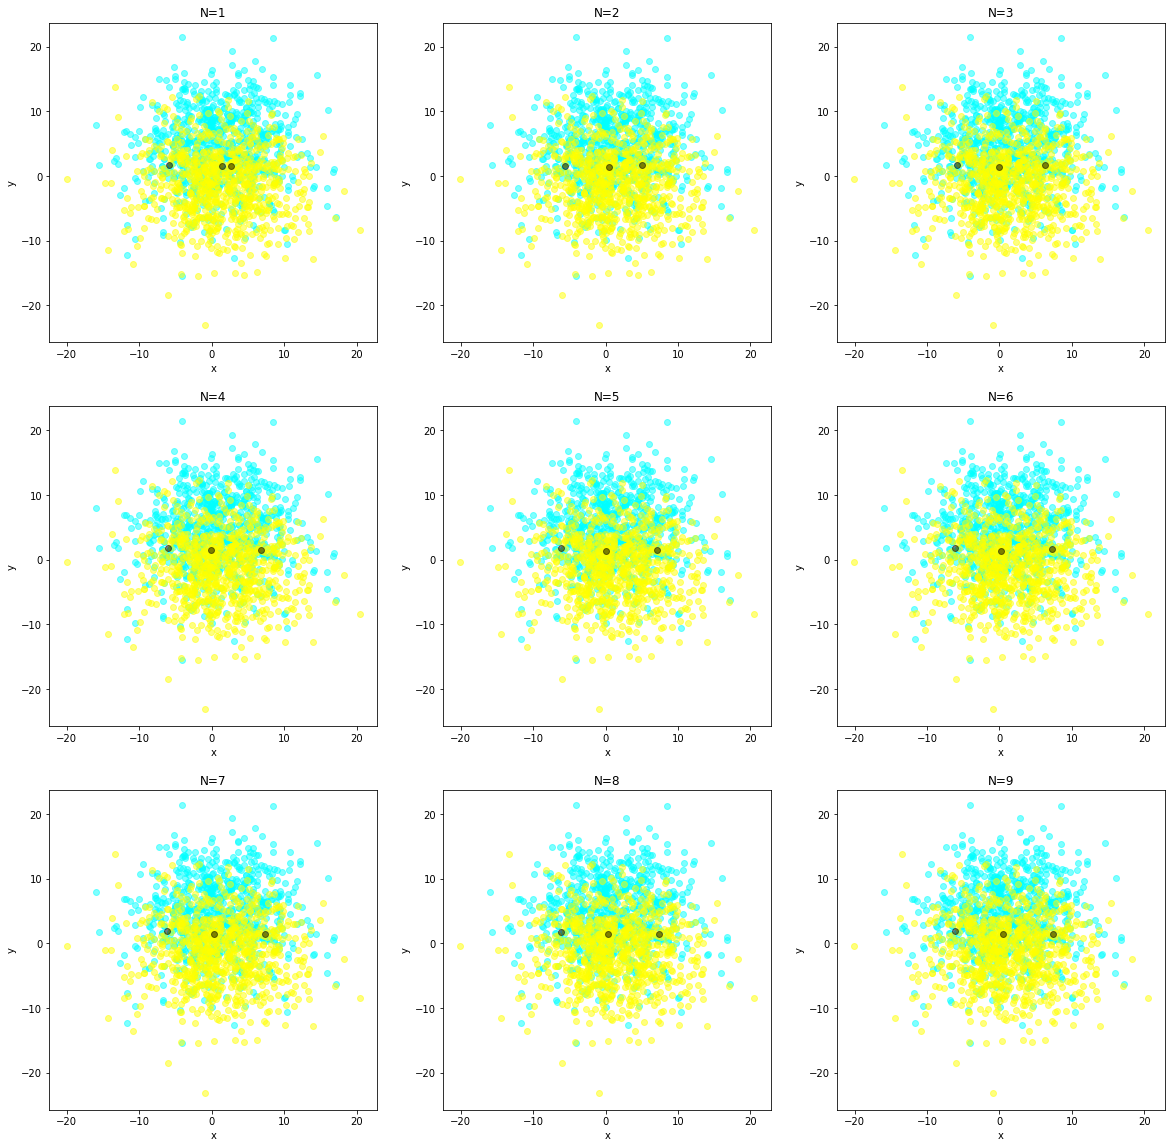

In [3]:
np.random.seed(9)

cluster_0_init = np.random.uniform(low=-3.0, high=3.0, size=(2,))
cluster_1_init = np.random.uniform(low=-3.0, high=3.0, size=(2,))
cluster_2_init = np.random.uniform(low=-3.0, high=3.0, size=(2,))

# N=1
cluster_0_N_1, cluster_1_N_1, cluster_2_N_1, cluster_0_list_N_1, cluster_1_list_N_1, cluster_2_list_N_1 = \
            train(data, label, 1, cluster_0_init, cluster_1_init, cluster_2_init)

# N=2
cluster_0_N_2, cluster_1_N_2, cluster_2_N_2, cluster_0_list_N_2, cluster_1_list_N_2, cluster_2_list_N_2 = \
            train(data, label, 2, cluster_0_init, cluster_1_init, cluster_2_init)

# N=3
cluster_0_N_3, cluster_1_N_3, cluster_2_N_3, cluster_0_list_N_3, cluster_1_list_N_3, cluster_2_list_N_3 = \
            train(data, label, 3, cluster_0_init, cluster_1_init, cluster_2_init)

# N=4
cluster_0_N_4, cluster_1_N_4, cluster_2_N_4, cluster_0_list_N_4, cluster_1_list_N_4, cluster_2_list_N_4 = \
            train(data, label, 4, cluster_0_init, cluster_1_init, cluster_2_init)

# N=5
cluster_0_N_5, cluster_1_N_5, cluster_2_N_5, cluster_0_list_N_5, cluster_1_list_N_5, cluster_2_list_N_5 = \
            train(data, label, 5, cluster_0_init, cluster_1_init, cluster_2_init)

# N=6
cluster_0_N_6, cluster_1_N_6, cluster_2_N_6, cluster_0_list_N_6, cluster_1_list_N_6, cluster_2_list_N_6 = \
            train(data, label, 6, cluster_0_init, cluster_1_init, cluster_2_init)

# N=1
cluster_0_N_7, cluster_1_N_7, cluster_2_N_7, cluster_0_list_N_7, cluster_1_list_N_7, cluster_2_list_N_7 = \
            train(data, label, 7, cluster_0_init, cluster_1_init, cluster_2_init)

# N=1
cluster_0_N_8, cluster_1_N_8, cluster_2_N_8, cluster_0_list_N_8, cluster_1_list_N_8, cluster_2_list_N_8 = \
            train(data, label, 8, cluster_0_init, cluster_1_init, cluster_2_init)

# N=1
cluster_0_N_9, cluster_1_N_9, cluster_2_N_9, cluster_0_list_N_9, cluster_1_list_N_9, cluster_2_list_N_9 = \
            train(data, label, 9, cluster_0_init, cluster_1_init, cluster_2_init)

cluster_0_list_root = []
cluster_1_list_root = []
cluster_2_list_root = []

# We put each point into it's cluster list.
for i in range(len(data)):
    if label[i] == 0:
        cluster_0_list_root.append(Point(data[i][0], data[i][1], label[i]))
    elif label[i] == 1:
        cluster_1_list_root.append(Point(data[i][0], data[i][1], label[i]))
    elif label[i] == 2:
        cluster_2_list_root.append(Point(data[i][0], data[i][1], label[i]))
        
x_0, y_0 = xes_and_ys(cluster_0_list_root)
x_1, y_1 = xes_and_ys(cluster_1_list_root)
x_2, y_2 = xes_and_ys(cluster_2_list_root)

plt.subplots(figsize= (20,20)) 
plt.subplot(3,3,1)
plt.title("N=1")
plt.scatter(x_0, y_0, c="cyan", alpha=0.5)
plt.scatter(x_1, y_1, c="yellow", alpha=0.5)
plt.scatter(x_2, y_2, c="#ebc3c0", alpha=0.5)
plt.scatter(cluster_0_N_1[0],cluster_0_N_1[1], c="black", alpha=0.5)
plt.scatter(cluster_1_N_1[0],cluster_1_N_1[1], c="black", alpha=0.5)
plt.scatter(cluster_2_N_1[0],cluster_2_N_1[1], c="black", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3,3,2)
plt.title("N=2")
plt.scatter(x_0, y_0, c="cyan", alpha=0.5)
plt.scatter(x_1, y_1, c="yellow", alpha=0.5)
plt.scatter(x_2, y_2, c="#ebc3c0", alpha=0.5)
plt.scatter(cluster_0_N_2[0],cluster_0_N_2[1], c="black", alpha=0.5)
plt.scatter(cluster_1_N_2[0],cluster_1_N_2[1], c="black", alpha=0.5)
plt.scatter(cluster_2_N_2[0],cluster_2_N_2[1], c="black", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3,3,3)
plt.title("N=3")
plt.scatter(x_0, y_0, c="cyan", alpha=0.5)
plt.scatter(x_1, y_1, c="yellow", alpha=0.5)
plt.scatter(x_2, y_2, c="#ebc3c0", alpha=0.5)
plt.scatter(cluster_0_N_3[0],cluster_0_N_3[1], c="black", alpha=0.5)
plt.scatter(cluster_1_N_3[0],cluster_1_N_3[1], c="black", alpha=0.5)
plt.scatter(cluster_2_N_3[0],cluster_2_N_3[1], c="black", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3,3,4)
plt.title("N=4")
plt.scatter(x_0, y_0, c="cyan", alpha=0.5)
plt.scatter(x_1, y_1, c="yellow", alpha=0.5)
plt.scatter(x_2, y_2, c="#ebc3c0", alpha=0.5)
plt.scatter(cluster_0_N_4[0],cluster_0_N_4[1], c="black", alpha=0.5)
plt.scatter(cluster_1_N_4[0],cluster_1_N_4[1], c="black", alpha=0.5)
plt.scatter(cluster_2_N_4[0],cluster_2_N_4[1], c="black", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3,3,5)
plt.title("N=5")
plt.scatter(x_0, y_0, c="cyan", alpha=0.5)
plt.scatter(x_1, y_1, c="yellow", alpha=0.5)
plt.scatter(x_2, y_2, c="#ebc3c0", alpha=0.5)
plt.scatter(cluster_0_N_5[0],cluster_0_N_5[1], c="black", alpha=0.5)
plt.scatter(cluster_1_N_5[0],cluster_1_N_5[1], c="black", alpha=0.5)
plt.scatter(cluster_2_N_5[0],cluster_2_N_5[1], c="black", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3,3,6)
plt.title("N=6")
plt.scatter(x_0, y_0, c="cyan", alpha=0.5)
plt.scatter(x_1, y_1, c="yellow", alpha=0.5)
plt.scatter(x_2, y_2, c="#ebc3c0", alpha=0.5)
plt.scatter(cluster_0_N_6[0],cluster_0_N_6[1], c="black", alpha=0.5)
plt.scatter(cluster_1_N_6[0],cluster_1_N_6[1], c="black", alpha=0.5)
plt.scatter(cluster_2_N_6[0],cluster_2_N_6[1], c="black", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3,3,7)
plt.title("N=7")
plt.scatter(x_0, y_0, c="cyan", alpha=0.5)
plt.scatter(x_1, y_1, c="yellow", alpha=0.5)
plt.scatter(x_2, y_2, c="#ebc3c0", alpha=0.5)
plt.scatter(cluster_0_N_7[0],cluster_0_N_7[1], c="black", alpha=0.5)
plt.scatter(cluster_1_N_7[0],cluster_1_N_7[1], c="black", alpha=0.5)
plt.scatter(cluster_2_N_7[0],cluster_2_N_7[1], c="black", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3,3,8)
plt.title("N=8")
plt.scatter(x_0, y_0, c="cyan", alpha=0.5)
plt.scatter(x_1, y_1, c="yellow", alpha=0.5)
plt.scatter(x_2, y_2, c="#ebc3c0", alpha=0.5)
plt.scatter(cluster_0_N_8[0],cluster_0_N_8[1], c="black", alpha=0.5)
plt.scatter(cluster_1_N_8[0],cluster_1_N_8[1], c="black", alpha=0.5)
plt.scatter(cluster_2_N_8[0],cluster_2_N_8[1], c="black", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(3,3,9)
plt.title("N=9")
plt.scatter(x_0, y_0, c="cyan", alpha=0.5)
plt.scatter(x_1, y_1, c="yellow", alpha=0.5)
plt.scatter(x_2, y_2, c="#ebc3c0", alpha=0.5)
plt.scatter(cluster_0_N_9[0],cluster_0_N_9[1], c="black", alpha=0.5)
plt.scatter(cluster_1_N_9[0],cluster_1_N_9[1], c="black", alpha=0.5)
plt.scatter(cluster_2_N_9[0],cluster_2_N_9[1], c="black", alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


